In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassNeuronaGral import NeuronaGradiente

In [65]:
# Leer FrutasTrain.csv
datos = pd.read_csv("../../Datos/FrutasTrain.csv")
nColum = list(datos.columns.values)

#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,0:2])
normalizarEntrada = 1

#--- SALIDA BINARIA ---
T = datos['Clase'] == 'Melon'  #es boolean
T = np.array(T * 1)  #lo convierte en binario
T = T*2-1

C:\Users\Mateo\Documents\1-uni\2024\cuatri2\aap\pra\pra3-adeline\C-NeuronaNoLineal\ClassNeuronaGral.py:118: RuntimeWarning: overflow encountered in exp
  return (2.0 / (1+np.exp(-2*x)) - 1)
C:\Users\Mateo\Documents\1-uni\2024\cuatri2\aap\pra\pra3-adeline\C-NeuronaNoLineal\PlotRegiones.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


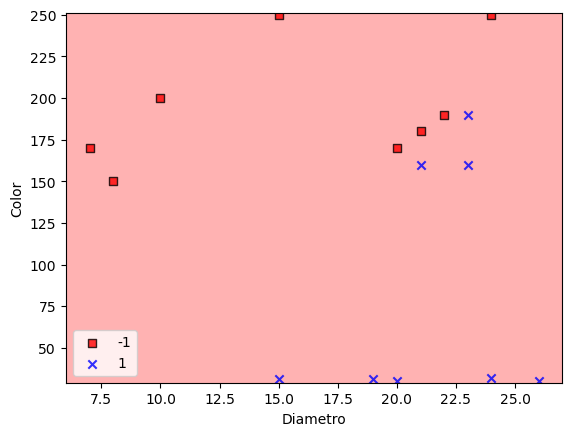

In [66]:
from PlotRegiones import plot_decision_regions

plot_decision_regions(X, T, classifier=ppn)
plt.xlabel(ppn.title[0])
plt.ylabel(ppn.title[1])
plt.legend(loc='lower left')
plt.show()

if normalizarEntrada:
    normalizador = preprocessing.StandardScaler()
    X = normalizador.fit_transform(X)
# X = 2*X-1 

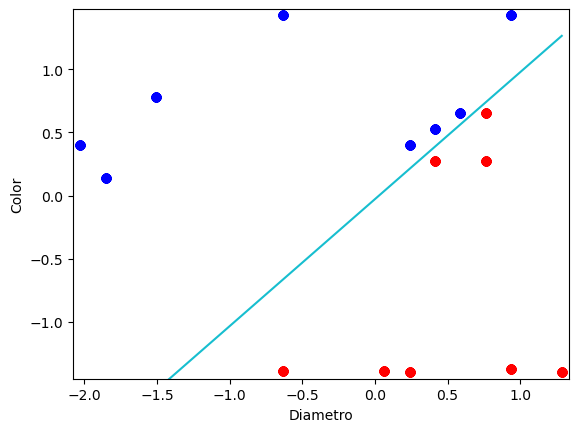

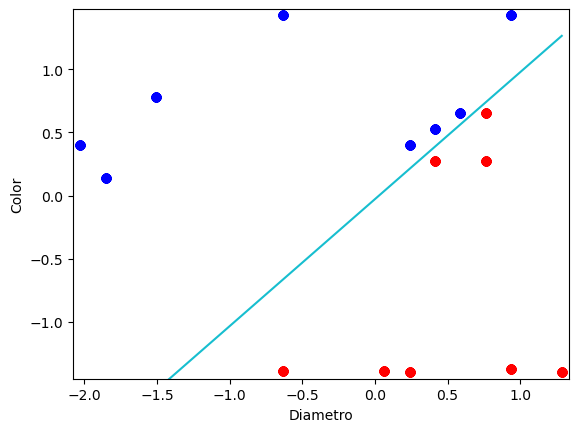

In [67]:
ppn = NeuronaGradiente(alpha=0.1, n_iter=50, cotaE=10e-07, FUN='tanh', random_state=None, draw=1, title=nColum[0:2])
ppn.fit(X, T)

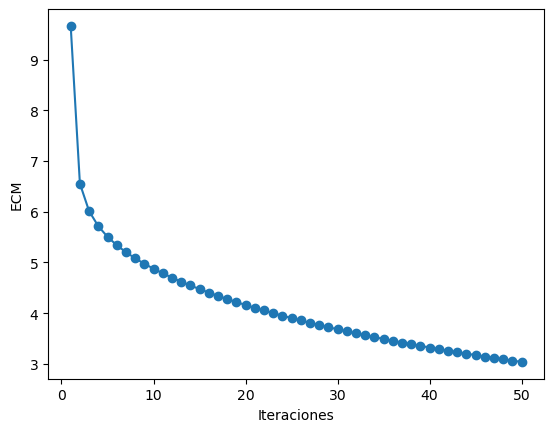

In [68]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

C:\Users\Mateo\Documents\1-uni\2024\cuatri2\aap\pra\pra3-adeline\C-NeuronaNoLineal\PlotRegiones.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


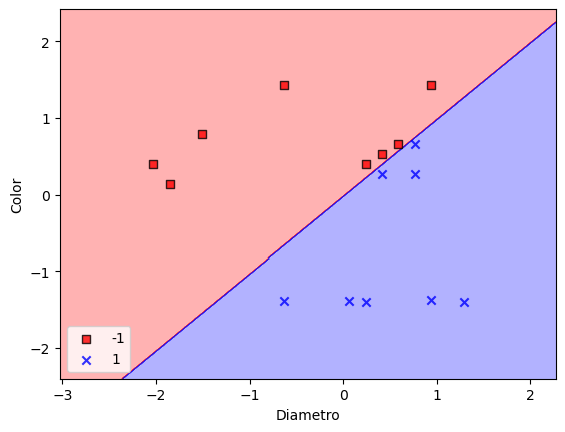

In [69]:
from PlotRegiones import plot_decision_regions

plot_decision_regions(X, T, classifier=ppn)
plt.xlabel(ppn.title[0])
plt.ylabel(ppn.title[1])
plt.legend(loc='lower left')
plt.show()

In [70]:
Y = ppn.predict(X)
print("Y = ", Y)
print("T = ", T)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))


Y =  [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
T =  [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
aciertos =  16
% de aciertos = 100.00 %


In [71]:
datos.info()
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diametro  16 non-null     int64 
 1   Color     16 non-null     int64 
 2   Clase     16 non-null     object
dtypes: int64(2), object(1)
memory usage: 516.0+ bytes


,Diametro,Color,Clase
0,10,200,Naranja
1,20,30,Melon
2,8,150,Naranja
3,26,30,Melon
4,7,170,Naranja


In [72]:
import math

def tanh(x):
    denominador = 1 + math.e**(-x)
    return (2 / (denominador)) -1
    
w1 = 2.65
w2 = -2.5
b = 0.03
cant_indef = 0

for row in X:
    d = row[0]
    c = row[1]
    neta = d*w1+c*w2+b
    prediccion = tanh(neta)
    print(prediccion)
    if abs(prediccion) > 0.8:
        cant_indef += 1
        
print(cant_indef)

-0.9946375326380804
0.9695859438488723
-0.989408792711179
0.998073867386974
-0.9964810678056409
0.994830450297415
-0.16409777677247905
0.22254466166929276
-0.0949430860899868
0.5970970580152279
-0.02485972313208451
0.20340414716097466
-0.48328237444375144
0.7228218488836038
-0.9891914142483557
0.9506136747406171
8


In [73]:
print(X)

[[-1.50462909  0.78461053]
 [ 0.23986841 -1.40200899]
 [-1.85352859  0.14148715]
 [ 1.2865669  -1.40200899]
 [-2.02797834  0.3987365 ]
 [ 0.9376674  -1.37628405]
 [ 0.23986841  0.3987365 ]
 [ 0.41431816  0.27011182]
 [ 0.41431816  0.52736118]
 [ 0.76321765  0.27011182]
 [ 0.58876791  0.65598586]
 [ 0.76321765  0.65598586]
 [ 0.9376674   1.42773392]
 [-0.63238034 -1.38914652]
 [-0.63238034  1.42773392]
 [ 0.06541866 -1.38914652]]


In [74]:
datos.head(16)

,Diametro,Color,Clase
0,10,200,Naranja
1,20,30,Melon
2,8,150,Naranja
3,26,30,Melon
4,7,170,Naranja
5,24,32,Melon
6,20,170,Naranja
7,21,160,Melon
8,21,180,Naranja
9,23,160,Melon


In [75]:
mis_datos = normalizador.transform([[16, 79]]) #-0.63238034, 0.14148715
mis_datos

array([[-0.45793059, -0.77174807]])

In [76]:
d = -0.62238034
c =  -0.60174807
neta = d*w1+c*w2+b
prediccion = tanh(neta)
print(prediccion)

-0.057405679567606116


In [77]:
print(( -1.37628405 + 0.27011182 ) / 2)

-0.5530861149999999
